In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For modeling and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.metrics import recall_score,precision_score,f1_score,fbeta_score,classification_report
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

#For modeling Ensembler
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error, mean_absolute_error, r2_score,confusion_matrix
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('Shopping_cart.csv')
df

,device_id,Item_Name,Total_Price,Price_For_Item,Quantity
0,esp32,Wheat 1kg,695,55,7
1,esp32,,0,0,0
2,esp32,Coca cola,295,40,3
3,esp32,,0,0,0
4,esp32,,0,0,0
...,...,...,...,...,...
553,esp32,apples,230,40,1
554,esp32,,0,0,0
555,esp32,Biscuit,310,30,1
556,esp32,,0,0,0


## EXPLORATORY DATA ANALYSIS

In [3]:
df.shape

(558, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   device_id       558 non-null    object
 1   Item_Name       558 non-null    object
 2   Total_Price     558 non-null    int64 
 3   Price_For_Item  558 non-null    int64 
 4   Quantity        558 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 21.9+ KB


In [5]:
df.describe()

,Total_Price,Price_For_Item,Quantity
count,558.000000,558.000000,558.000000
mean,230.098566,43.198925,1.017921
std,288.420043,63.841210,1.400065
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,80.000000,30.000000,0.000000
75%,395.000000,55.000000,2.000000
max,1195.000000,200.000000,7.000000


In [6]:
df = df.drop_duplicates()
df

,device_id,Item_Name,Total_Price,Price_For_Item,Quantity
0,esp32,Wheat 1kg,695,55,7
1,esp32,,0,0,0
2,esp32,Coca cola,295,40,3
5,esp32,Wheat 1kg,375,55,1
6,esp32,Earphones,365,200,1
...,...,...,...,...,...
527,esp32,Wheat 1kg,610,55,6
537,esp32,Wheat 1kg,880,55,0
545,esp32,Wheat 1kg,340,55,4
549,esp32,Wheat 1kg,395,55,3


In [7]:
df.describe()

,Total_Price,Price_For_Item,Quantity
count,166.000000,166.000000,166.000000
mean,465.391566,75.632530,1.969880
std,271.060762,65.141272,1.394468
min,0.000000,0.000000,0.000000
25%,295.000000,40.000000,1.000000
50%,395.000000,40.000000,2.000000
75%,610.000000,55.000000,3.000000
max,1195.000000,200.000000,7.000000


In [8]:
df.isnull().sum()

device_id         0
Item_Name         0
Total_Price       0
Price_For_Item    0
Quantity          0
dtype: int64

In [9]:
df.nunique() 

device_id           1
Item_Name           6
Total_Price       106
Price_For_Item      5
Quantity            8
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(columns=[],inplace=True) 
df.head()

,device_id,Item_Name,Total_Price,Price_For_Item,Quantity
0,esp32,Wheat 1kg,695,55,7
1,esp32,,0,0,0
2,esp32,Coca cola,295,40,3
5,esp32,Wheat 1kg,375,55,1
6,esp32,Earphones,365,200,1


 ## Pre-Processing and Feature Engineering

In [12]:
df = df[df['Total_Price'] != 0]
df['Total_Price'] = df['Total_Price'].astype(float) #converting the object to float
df

,device_id,Item_Name,Total_Price,Price_For_Item,Quantity
0,esp32,Wheat 1kg,695.0,55,7
2,esp32,Coca cola,295.0,40,3
5,esp32,Wheat 1kg,375.0,55,1
6,esp32,Earphones,365.0,200,1
7,esp32,Biscuit,85.0,30,1
...,...,...,...,...,...
527,esp32,Wheat 1kg,610.0,55,6
537,esp32,Wheat 1kg,880.0,55,0
545,esp32,Wheat 1kg,340.0,55,4
549,esp32,Wheat 1kg,395.0,55,3


In [13]:
#remove outliners
def remove_outlier(df_in, col_name):
    df[col_name] = df[col_name].astype(int)
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

print("Old Shape: ", df.shape)

for col in df:
  if col!='device_id':
    #df=remove_outlier(df, col)
    continue
print("New Shape: ", df.shape)

Old Shape:  (165, 5)
New Shape:  (165, 5)


In [14]:
#filing empty cells
for col in df:
  if df.dtypes[col]is not int:
    df[col].fillna(df[col].mode(), inplace = True)
  else:
    df[col].fillna(df[col].median(), inplace = True)
df.head()

,device_id,Item_Name,Total_Price,Price_For_Item,Quantity
0,esp32,Wheat 1kg,695.0,55,7
2,esp32,Coca cola,295.0,40,3
5,esp32,Wheat 1kg,375.0,55,1
6,esp32,Earphones,365.0,200,1
7,esp32,Biscuit,85.0,30,1


<AxesSubplot:>

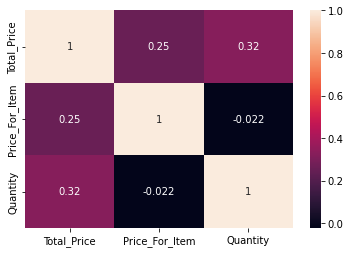

In [15]:
sns.heatmap(df.corr(),annot = True) #heat map

## Visualization

<AxesSubplot:xlabel='Total_Price', ylabel='Count'>

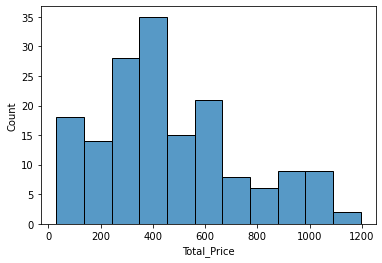

In [16]:
sns.histplot(data = df, x = 'Total_Price', bins = 'auto')

<AxesSubplot:ylabel='Item_Name'>

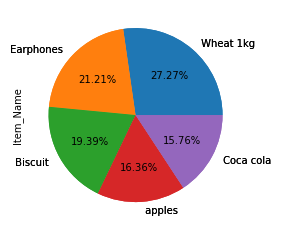

In [17]:
df['Item_Name'].value_counts().head(10).plot.pie()
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')
df['Item_Name'].value_counts().plot(kind='pie',autopct = "%0.2f%%")

<AxesSubplot:xlabel='Total_Price', ylabel='Quantity'>

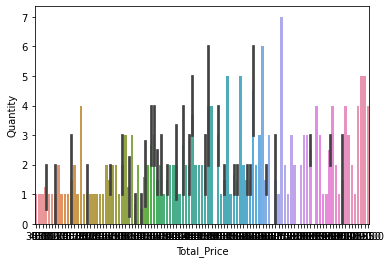

In [18]:
sns.barplot(x='Total_Price',y='Quantity',data=df)

<AxesSubplot:xlabel='Total_Price', ylabel='Price_For_Item'>

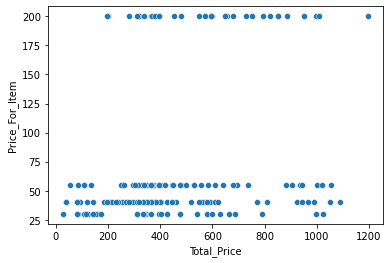

In [19]:
sns.scatterplot(data = df, x='Total_Price', y='Price_For_Item')

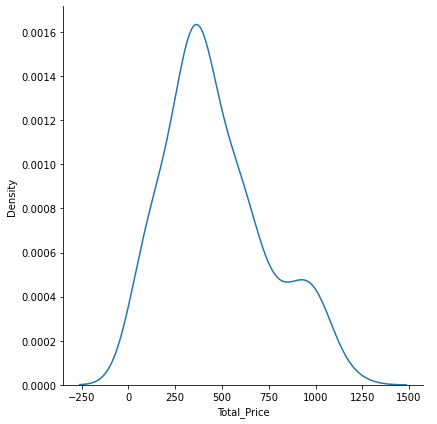

In [20]:
sns.FacetGrid(df, height = 6).map(sns.kdeplot, 'Total_Price').add_legend()

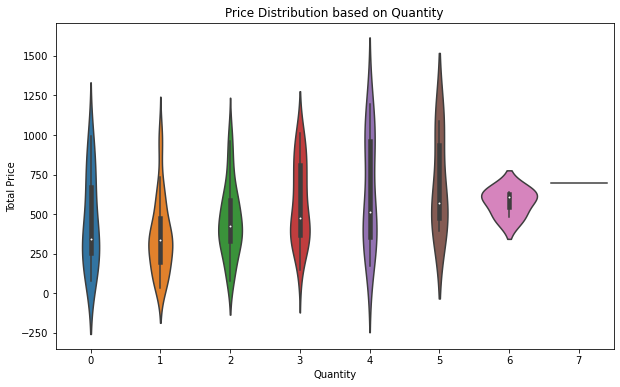

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Quantity', y='Total_Price')
plt.ylabel('Total Price')
plt.xlabel('Quantity')
plt.title('Price Distribution based on Quantity')
plt.show()

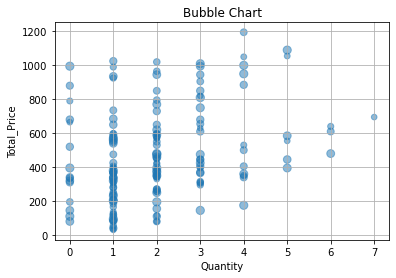

In [61]:
sizes = np.random.randint(30, 70, 165)
plt.scatter(df['Quantity'], df['Total_Price'], s=sizes, alpha=0.5)

# Customize the chart
plt.title('Bubble Chart')
plt.xlabel('Quantity')
plt.ylabel('Total_Price')
plt.grid(True)

# Show the chart
plt.show()

## Modelling

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Item_Name'] = label_encoder.fit_transform(df['Item_Name'])

df


,device_id,Item_Name,Total_Price,Price_For_Item,Quantity
0,esp32,3,695.0,55,7
2,esp32,1,295.0,40,3
5,esp32,3,375.0,55,1
6,esp32,2,365.0,200,1
7,esp32,0,85.0,30,1
...,...,...,...,...,...
527,esp32,3,610.0,55,6
537,esp32,3,880.0,55,0
545,esp32,3,340.0,55,4
549,esp32,3,395.0,55,3


In [32]:
X = df.drop(['device_id','Quantity'], axis=1)
y = df['Quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(132, 3) (33, 3) (132,) (33,)


In [33]:
# Sample data
data = df['Item_Name']


encoded_data = pd.get_dummies(data, columns=['Item_Name'])

print(encoded_data)

     0  1  2  3  4
0    0  0  0  1  0
2    0  1  0  0  0
5    0  0  0  1  0
6    0  0  1  0  0
7    1  0  0  0  0
..  .. .. .. .. ..
527  0  0  0  1  0
537  0  0  0  1  0
545  0  0  0  1  0
549  0  0  0  1  0
550  0  0  0  1  0

[165 rows x 5 columns]


In [34]:
# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred= model.predict(X_test)
accuracy_score(y_test, y_pred)

0.18181818181818182

In [35]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled  = sc.transform(X_test)

Accuracy is 15.151515151515152


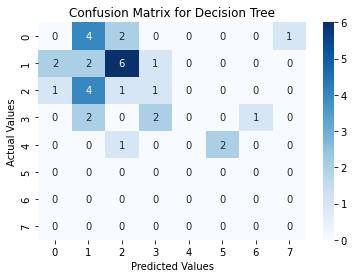

In [36]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
cm=confusion_matrix(y_test,y_pred)
plt.title("Confusion Matrix for Decision Tree")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)*100))

Accuracy is 12.121212121212121


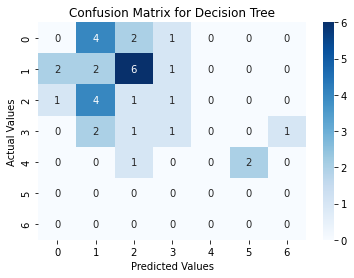

In [37]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
cm=confusion_matrix(y_test,y_pred)
plt.title("Confusion Matrix for Decision Tree")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)*100))

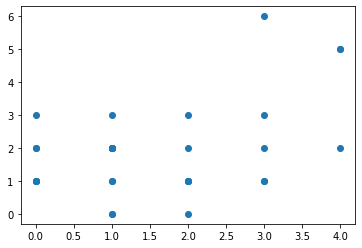

In [38]:
plt.scatter(y_test,y_pred)

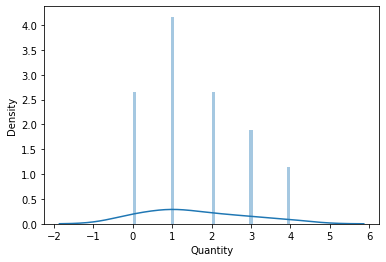

In [39]:
sns.distplot((y_test),bins=50);

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.2121212121212122
MSE: 2.0
RMSE: 1.4142135623730951


In [41]:
models={
    'Logistic Reression':LogisticRegression(),
    'K-Nearest neighbours':KNeighborsClassifier(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Support Vector machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'Random Forest':RandomForestClassifier(),
    'Ridge classifier':RidgeClassifier()
}
y_predicitions=[]
estimators=[]
y_accu=[]
x_graph=[]
for name,model in  models.items():
    print(f'{name}: ')
    x_graph.append(name)
    estimators.append((name, model))
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_predicitions.append(y_pred)
    print(f'Accuracy :{accuracy_score(y_train,model.predict(X_train))}')

    y_accu.append(accuracy_score(y_train,model.predict(X_train))*100)
    '''
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(9,5))
    plt.title(f"Confusion Matrix for {name}")
    sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    '''
    print(classification_report(y_test,y_pred, ))
    print('-'*33)

Logistic Reression: 
Accuracy :0.4015151515151515
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.33      0.45      0.38        11
           2       0.06      0.14      0.08         7
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.18        33
   macro avg       0.08      0.12      0.09        33
weighted avg       0.12      0.18      0.15        33

---------------------------------
K-Nearest neighbours: 
Accuracy :0.5303030303030303
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.37      0.64      0.47        11
           2       0.20      0.29      0.24         7
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.30      

In [42]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Text(0.5, 1.03, 'Model Comparison - Model Accuracy')

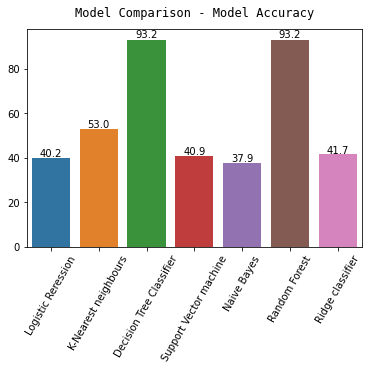

In [43]:
plt.xticks(rotation=60)
ax=sns.barplot(x=x_graph ,y=y_accu, errwidth=0)
show_values(ax)
plt.title('Model Comparison - Model Accuracy', fontname='monospace', y=1.03)

## Ensemble Models

#### Basic ensemble methods

#### Using Avegering

In [44]:
pred_final=[0]*len(y_predicitions[0])
num=len(y_predicitions)
for i in range(num):
  pred_final+=y_predicitions[i]
pred_final=pred_final/num
pred_final=np.round_(pred_final, 0)
pred_final=pred_final.astype(int)
print(classification_report(y_test,pred_final, ))
print(f'Accuracy :{accuracy_score(y_train,model.predict(X_train))*100}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.33      0.36      0.35        11
           2       0.14      0.29      0.19         7
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.18        33
   macro avg       0.10      0.13      0.11        33
weighted avg       0.14      0.18      0.16        33

Accuracy :41.66666666666667


In [45]:
model_1 = DecisionTreeClassifier()
model_2 = SVC()
model_3 = GaussianNB()
 
# training all the model on the training dataset
model_1.fit(X_train_scaled, y_train)
model_2.fit(X_train_scaled, y_train)
model_3.fit(X_train_scaled, y_train)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test_scaled)
pred_2 = model_2.predict(X_test_scaled)
pred_3 = model_3.predict(X_test_scaled)
 
# final prediction after averaging on the prediction of all 3 models
pred_final =((pred_1+pred_2+pred_3)/3.0).astype(int)

# printing the mean squared error between real value and predicted value
print(f'Accuracy :{accuracy_score(y_test,pred_final)}')

Accuracy :0.2727272727272727


In [46]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = GaussianNB()
model_3 = RandomForestClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(
	estimators=[('lr', model_1), ('gnb', model_2), ('rf', model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(X_train_scaled, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test_scaled)

print(f'Accuracy :{accuracy_score(y_test,pred_final)}')

Accuracy :0.24242424242424243


### Using Max voting

In [47]:
model_1 = LogisticRegression()
model_2 = GaussianNB()
model_3 = RandomForestClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(
	estimators=[('lr', model_1), ('gnb', model_2), ('rf', model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(X_train_scaled, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test_scaled)

print(f'Accuracy :{accuracy_score(y_test,pred_final)}')

Accuracy :0.24242424242424243


## Hypothesis Testing

H0: Null hypothesis states that the mean value of target variable in training dataset is same as the mean value of predicted value of test sample.

Ha:It states that the mean value of target variable in training dataset defers largely compared to the mean value of predicted value of test sample

In [48]:
mean_value = np.mean(y_train)

In [49]:
df

,device_id,Item_Name,Total_Price,Price_For_Item,Quantity
0,esp32,3,695.0,55,7
2,esp32,1,295.0,40,3
5,esp32,3,375.0,55,1
6,esp32,2,365.0,200,1
7,esp32,0,85.0,30,1
...,...,...,...,...,...
527,esp32,3,610.0,55,6
537,esp32,3,880.0,55,0
545,esp32,3,340.0,55,4
549,esp32,3,395.0,55,3


In [50]:
y_train

196    2
56     2
496    6
201    1
42     2
      ..
23     1
259    1
150    1
316    3
94     1
Name: Quantity, Length: 132, dtype: int64

In [51]:
mean_value

2.0833333333333335

In [52]:
sample_std = np.std(y_test)

In [53]:
sample_std

1.2316606929031255

In [54]:
y_tst_mean = np.mean(y_pred)

In [55]:
y_tst_mean

1.4545454545454546

In [56]:
n = 165
degrees_of_freedom = n-1
xbar = y_tst_mean
mu = mean_value
s = sample_std
alpha = 0.507

In [57]:
t = (xbar - mu)/(s / np.sqrt(n))
t

-6.557752952753427

In [58]:
import numpy as np
import scipy.stats as st
t_critical = st.t.ppf(alpha/2, degrees_of_freedom)
t_critical

-0.6649757962510469

In [59]:
if (abs(t) > abs(t_critical)): #Absolute value taken as the it's a two-tailed test and the original t_critical value might be negative
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected
